# Estimación Pose Humana 2D

Intregrantes:


*   Fernada Bravo C.
*   Belén Díaz D.
*   Esteban Gomez T.
*   Rodrigo Reyes M.

Docente:

*   Dr. Oscar Magna V.






## 1. ¿Qué es la estimación de pose humana en 2D y cuáles son su aplicaciones principales?

La estimación de pose es aquel método de visión computacinal utilizado para detectar las articulaciones y otros puntos clave del cuerpo humano. Pero fue a partir del trabajo de Toshev y Szegedy del año 2014 y de su sistema DeepPose cuando se adoptaron mayoritariamente con este fin modelos basados en redes convolucionales.

Las aplicaciones principales de la estimación de la pose humana son reconocimiento de gestos, seguridad, vigilancia, robótica, etc.

## 2. Explique el concepto de "Keypoints" o puntos clave en el contexto de la estimación de pose humana (señale y describa 3 ejemplos)

Keypoints, hace referencia a puntos relevantes del cuerpo humano (articulaciones), estos puntos son usados para definir y construir la postura de una persona en un eje de coordenadas de dos dimensiones (x,y)


Ejemplos:


1.   Rodilla: Este keypoint es comunmente utilizado para analizar el movimiento de las piertas y poder determinar si una persona esta o no en movimiento.

2.   Muñeca: Para determinar los gestos de las manos y movimiento de los brazos.
3.   Tobillo: Para analizar la postura del ser humano y determinar si esta caminando o corriendo.






## 3. Describa la arquitectura básica de una red neuronal para la estimación de pose humana



1.   Red convolucional para extraer características relevantes de la imagen

2.   Mapas de calor, genera un heatmap por cada keypoint que indica la probabilidad de que un punto esté es una ubicación específica.


3.   Campos de afinidad de partes, para identificar cómo están conectados los keypoints entre sí, logrando formar el esqueleto

4. Salida. entrega las coordenadas (x,y) de los keypoints y las conexiones.




## 4. ¿Qué es un "Heat map" en el contexto de la estimación de pose y cómo se utiliza?

Un heatmap en el contexto de la estimación de pose es una representación visual que indica las áreas probables donde se encuentran los keypoints (articulaciones principales del cuerpo)

## 5. Explique el desafío de las oclusiones en la estimación de pose humana y como se aborda.

Las oclusiones son ocasiondas cuando una parte del cuerpo, esta tapada o bloqueada (no se ve con claridad). Impidiendo que el sistema vea o identifique el keypoint, dificultando la detección de la extremidad y la estimación de la pose humana.

Este problema se aborda mediante predicciones basada en el contexto, en lugar de depender solo de la visibilidad del frame donde esta ubicado el keypoint (el modelo infiere donde esta un keypoint en base a la posición de los demas)

Ademas, usando heatmaps que predicen la probabilidad de que un keypoint esté en una región específica de la imagen.

## 6. ¿Qué es el "Part Affinity Fields" (PAF) y cómo se utiliza en la estimación de pose multipersona?

Es una técnica utilizada en la estimación de pose humana multipersona desarrollada por OpenPose. Los PAF son vectores que describen las conexiones entre diferentes keypoints, permitiendo al sistema identificar como están conectadas las articulaciones entre sí.

## 7. Describa al menos tres métricas comunes utilizadas para evaluar modelos de estimación de pose humana



1.   Error de distancia media en píxeles, mide la distancia media entre los puntos clave predichos y las posiciones reales en términos de píxeles o unidades de espacio, como milímetros. Un valor bajo en esta métrica quiero decir que la precisión del modelo es alta.
2.   Presición de keypoints, mide el porcentaje de keypoints que el modelo realizo predicciones correctamente dentro de un umbral de distancia con respecto a las posiciones reales.

3.  Media de precisión promedio, mide la precisión del modelo evaluando tanto predicciones correctas como incorrectas, es decir la capacidad del modelo de predecir correctamente keypoints. Se basa en la relación entre la precisión y recuperación a diferentes umbrales.



## 8. ¿Qué es el "top-down approach" versus el "bottom-up approach" en la estimación de pose multi-persona?

En la estimación de pose multipersona, existen dos enfoques principales para detectar las poses de varias personas. Estos enfoques tratan de resolver el problema de identificar las articulaciones de cada persona en la escena, pero de manera distinta.

Top down approach: Detecta a cada persona de la imagen, y luego, para cada persona detectada predecir los keypoints asociados.

Bottom up approach: Detecta los keypoints del cuerpo de todas las personas en la escena de manera simultánea, sin saber inicialmente a qué persona pertenece cada keypoint. Luego, estos puntos claves de agrupan para formar los esqueletos de cada persona individual.

## 9. Explique cómo se puede aplicar la estimación de pose humana en tiempo real y qué desafíos presenta y, además, cómo se ha planteado las alternativas de solución y sus resultados.

La estimación de pose en tiempo real, tiene aplicaciones importantes en deportes, salud, interfaces gestuales, etc. Por otro lado, los desafíos de eficiencia computacional, precisión y capacidad de hardware, existen soluciones como MoveNet, MediaPipe, uso de cuantización y pruning que han mejorado el rendimiento y la accesibilidad de la estimación de pose en tiempo real en una amplia gama de dispositivos y herramientas.

## 10. ¿Cómo se puede utilizar el "transfer learning" en modelos de estimación de pose humana?

El transfer learning es una técnica que permite reutilizar un modelo preentrenado para mejorar el rendimiento de un nuevo modelo con menos datos, para hacerlo en la estimación de pose humana podemos utilizar Resnet o MobileNet, para acelerar y mejorar el rendimiento en la deteccioón de keypoints. Se ajustan las últimas capas del modelo a los datos específicas, mientras que las capas iniciales (las que capturan características generales) se mantienen fijas o se afinan levemente.



# Estimación pose humana con mediapipe


*   Librerias



In [ ]:
!pip install mediapipe

In [ ]:
import cv2
import mediapipe as mp
from google.colab.patches import cv2_imshow
from google.colab import drive
import math

In [ ]:
drive.mount("/content/drive/")

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


## Mostrar los keypoints de una imagen

/usr/local/lib/python3.10/dist-packages/google/protobuf/symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '


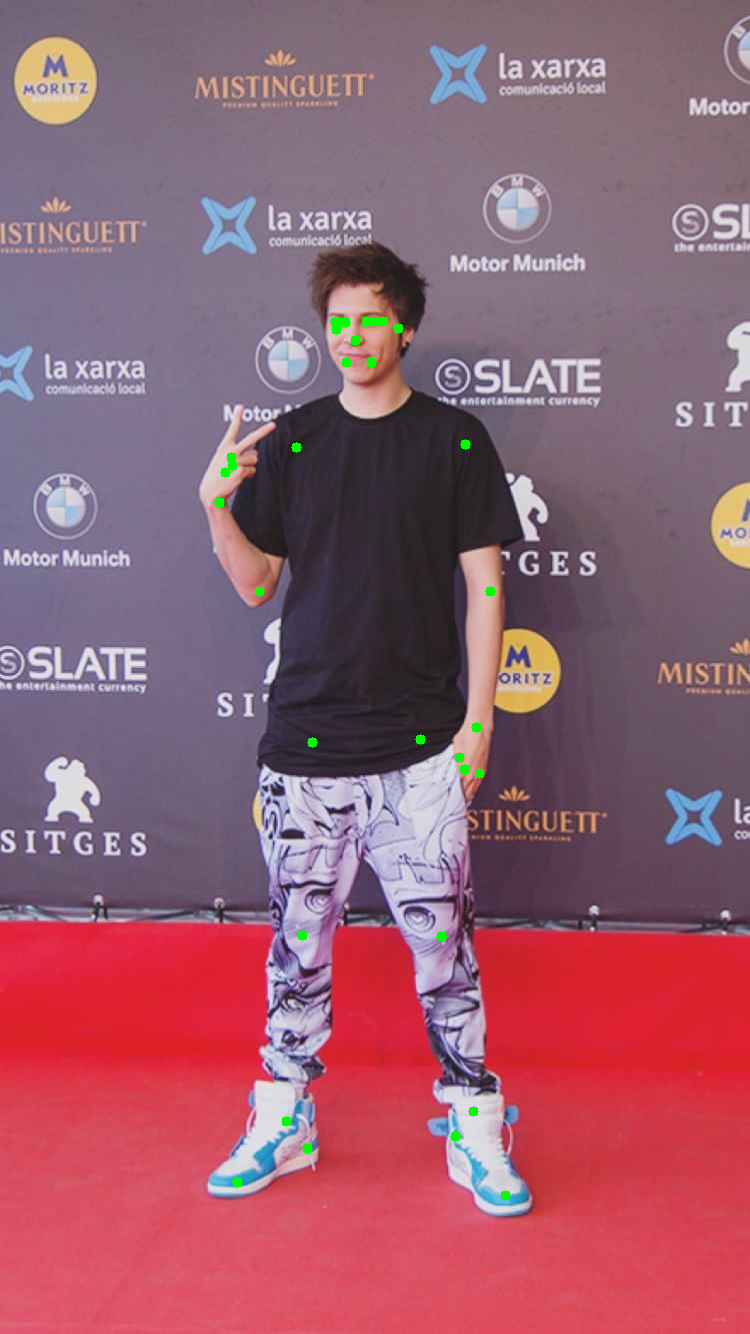

In [ ]:
mp_drawing = mp.solutions.drawing_utils
mp_pose = mp.solutions.pose

# Cargar la imagen del directorio
image_path = '/content/drive/Shareddrives/Semestre 10mo/Electivo IA/Lab 2/media/cd82f16882d5e9d9763dd290f461dfc9.jpg' ## COLOCAR LA RUTA DE UNA IMAGEN
image = cv2.imread(image_path)

if image is None:
    print(f"Error: No se pudo cargar la imagen en la ruta: {image_path}")
    exit()
# Creamos la instancia pasa usar mediapipe con nuestra foto
with mp_pose.Pose(static_image_mode=True) as pose:
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    results = pose.process(image_rgb)
    if results.pose_landmarks is not None:
        landmarks = results.pose_landmarks.landmark
        for landmark in landmarks:
            x = int(landmark.x * image.shape[1])
            y = int(landmark.y * image.shape[0])
            cv2.circle(image, (x, y), 5, (0, 255, 0), -1)
        cv2_imshow(image)
        cv2.waitKey(0)
        cv2.destroyAllWindows()

    else:
        print("No se detectaron poses en la imagen.")

## Mostrar imagen de la pose humana uniendo los keypoints

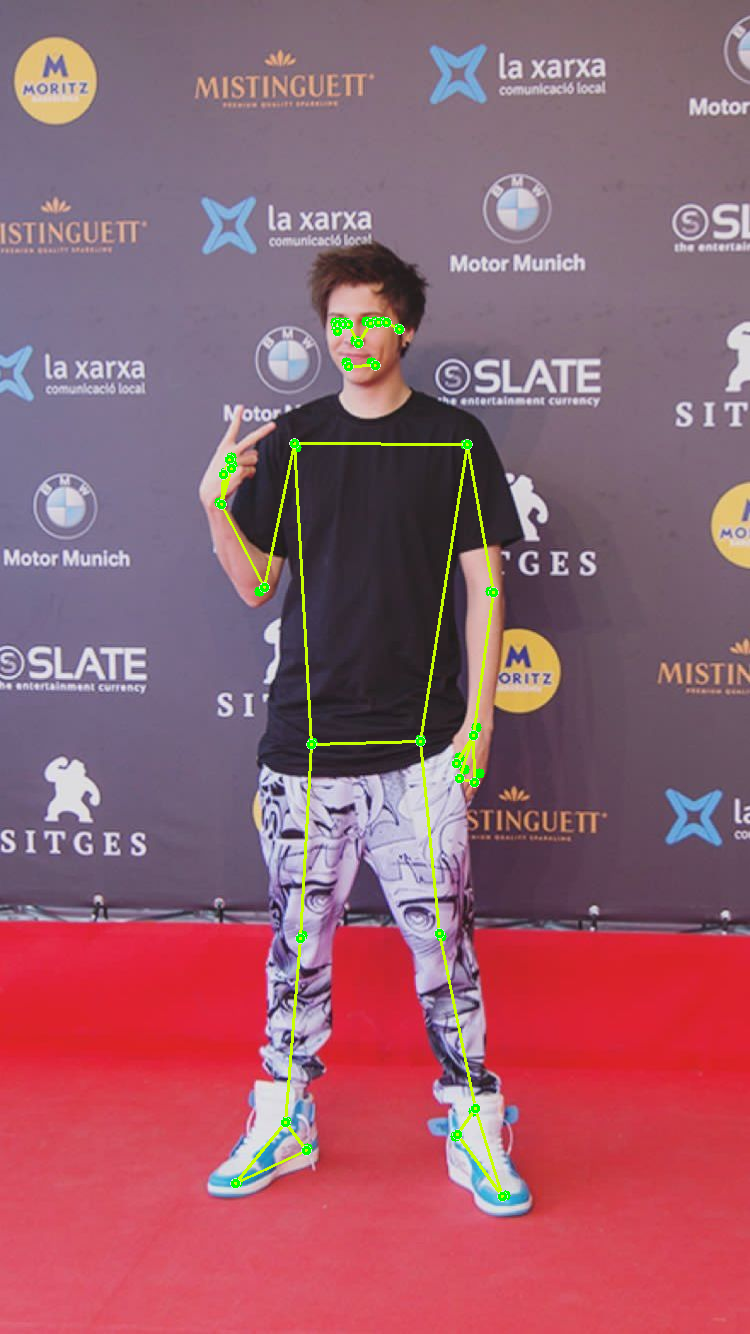

In [ ]:
# Crear un objeto Pose para la detección de poses
with mp_pose.Pose(static_image_mode=True) as pose:
    # Convertir la imagen a RGB
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    # Procesar la imagen para detectar la pose
    results = pose.process(image_rgb)

    # Si se detectan puntos de referencia del cuerpo
    if results.pose_landmarks is not None:
        # Dibujar los puntos clave (landmarks) y las conexiones (líneas)
        mp_drawing.draw_landmarks(
            image,  # Imagen en la que dibujar
            results.pose_landmarks,  # Los keypoints detectados
            mp_pose.POSE_CONNECTIONS,  # Las conexiones entre keypoints
            mp_drawing.DrawingSpec(color=(0, 255, 0), thickness=2, circle_radius=3),
            mp_drawing.DrawingSpec(color=(0, 255, 200), thickness=2, circle_radius=2)
        )
        cv2_imshow(image)
        cv2.waitKey(0)
        cv2.destroyAllWindows()

# Detectar persona, realizar conteo de poses y estimación de pose 2D

In [ ]:
contador_sentado = 0
contador_manos_arriba = 0
manos_arriba = False
sentado = False

## Calcular el angulo de las articulaciones, para determinar la posición de esta

In [ ]:
def calcular_angulo(a, b, c):
    a = [a.x, a.y]
    b = [b.x, b.y]
    c = [c.x, c.y]

    angulo = math.degrees(
        math.atan2(c[1] - b[1], c[0] - b[0]) - math.atan2(a[1] - b[1], a[0] - b[0])
    )
    angulo = abs(angulo)  # Valor absoluto del ángulo
    if angulo > 180.0:
        angulo = 360 - angulo
    return angulo

## Funciones para determinar la posición

In [ ]:
def esta_sentado(landmarks):
    cadera_izq = landmarks[mp_pose.PoseLandmark.LEFT_HIP.value]
    rodilla_izq = landmarks[mp_pose.PoseLandmark.LEFT_KNEE.value]
    cadera_der = landmarks[mp_pose.PoseLandmark.RIGHT_HIP.value]
    rodilla_der = landmarks[mp_pose.PoseLandmark.RIGHT_KNEE.value]
    return (cadera_izq.y >= rodilla_izq.y) or (cadera_der.y >= rodilla_der.y)


In [ ]:
def manos_levantadas(landmarks):
    muñeca_izq = landmarks[mp_pose.PoseLandmark.LEFT_WRIST.value]
    hombro_izq = landmarks[mp_pose.PoseLandmark.LEFT_SHOULDER.value]
    muñeca_der = landmarks[mp_pose.PoseLandmark.RIGHT_WRIST.value]
    hombro_der = landmarks[mp_pose.PoseLandmark.RIGHT_SHOULDER.value]
    return (muñeca_izq.y < hombro_izq.y) and (muñeca_der.y < hombro_der.y)


## Apertura de video, desde el directorio

Este fragmento generará dos videos con las detecciones dentro del archivo que pasaremos.

In [ ]:
# Abrir el video
cap = cv2.VideoCapture("/content/drive/Shareddrives/Semestre 10mo/Electivo IA/Lab 2/media/95854a85-66b7-4d02-a895-cb365f651373.mp4")

# Obtener las dimensiones del video original
width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
fps = int(cap.get(cv2.CAP_PROP_FPS))

# Definir el códec y crear los objetos VideoWriter para guardar los videos en AVI y MP4
output_video_avi = cv2.VideoWriter('output_pose_detection.avi',
                                   cv2.VideoWriter_fourcc(*'XVID'),
                                   fps,
                                   (width, height))

output_video_mp4 = cv2.VideoWriter('output_pose_detection.mp4',
                                   cv2.VideoWriter_fourcc(*'mp4v'),
                                   fps,
                                   (width, height))

if not cap.isOpened():
    print("Error: No se pudo abrir el archivo de video.")
    exit()

## Estimación de pose humana en video.

In [ ]:
with mp_pose.Pose(static_image_mode=False) as pose:
    while True:
        ret, frame = cap.read()

        if not ret:
            print("Advertencia: No se pudo leer un cuadro del video.")
            break

        # Obtener dimensiones del cuadro
        height, width, _ = frame.shape
        frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)

        # Procesar las poses
        results = pose.process(frame_rgb)

        # Si se detectan puntos de referencia del cuerpo
        if results.pose_landmarks is not None:
            landmarks = results.pose_landmarks.landmark

            # Dibujar la pose en el cuadro
            mp_drawing.draw_landmarks(
                frame,
                results.pose_landmarks,
                mp_pose.POSE_CONNECTIONS,
                mp_drawing.DrawingSpec(color=(128,0,250), thickness=2, circle_radius=3),
                mp_drawing.DrawingSpec(color=(128,0,250), thickness=2, circle_radius=3)
            )

            # Encontrar las coordenadas del cuerpo para crear un "bounding box"
            x_min = min([lm.x for lm in landmarks]) * width
            x_max = max([lm.x for lm in landmarks]) * width
            y_min = min([lm.y for lm in landmarks]) * height
            y_max = max([lm.y for lm in landmarks]) * height

            # Dibujar un rectángulo alrededor del cuerpo
            cv2.rectangle(frame, (int(x_min), int(y_min)), (int(x_max), int(y_max)), (0, 255, 0), 2)

            # Verificar si la persona está sentada
            if esta_sentado(landmarks):
                if not sentado:  # Si no se ha contado ya
                    contador_sentado += 1
                    sentado = True
                cv2.putText(frame, "Sentado", (50, 50), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 0, 0), 2)
            else:
                sentado = False

            # Verificar si las manos están levantadas
            if manos_levantadas(landmarks):
                if not manos_arriba:  # Si no se ha contado ya
                    contador_manos_arriba += 1
                    manos_arriba = True
                cv2.putText(frame, "Manos Arriba", (50, 100), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 0, 0), 2)
            else:
                manos_arriba = False

            # Calcular y mostrar ángulos de codo y rodilla
            angulo_codo_izq = calcular_angulo(landmarks[mp_pose.PoseLandmark.LEFT_SHOULDER.value],
                                               landmarks[mp_pose.PoseLandmark.LEFT_ELBOW.value],
                                               landmarks[mp_pose.PoseLandmark.LEFT_WRIST.value])

            angulo_codo_der = calcular_angulo(landmarks[mp_pose.PoseLandmark.RIGHT_SHOULDER.value],
                                               landmarks[mp_pose.PoseLandmark.RIGHT_ELBOW.value],
                                               landmarks[mp_pose.PoseLandmark.RIGHT_WRIST.value])

            angulo_rodilla_izq = calcular_angulo(landmarks[mp_pose.PoseLandmark.LEFT_HIP.value],
                                                 landmarks[mp_pose.PoseLandmark.LEFT_KNEE.value],
                                                 landmarks[mp_pose.PoseLandmark.LEFT_ANKLE.value])

            angulo_rodilla_der = calcular_angulo(landmarks[mp_pose.PoseLandmark.RIGHT_HIP.value],
                                                 landmarks[mp_pose.PoseLandmark.RIGHT_KNEE.value],
                                                 landmarks[mp_pose.PoseLandmark.RIGHT_ANKLE.value])

            # Mostrar el contador de posturas en pantalla
            cv2.putText(frame, f"Conteo Sentado: {contador_sentado}", (50, 150), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2)
            cv2.putText(frame, f"Conteo Manos Arriba: {contador_manos_arriba}", (50, 200), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2)

        # Guardar el cuadro procesado en los videos de salida (AVI y MP4)
        output_video_avi.write(frame)
        output_video_mp4.write(frame)

cap.release()
output_video_avi.release()  # Liberar el objeto VideoWriter para AVI
output_video_mp4.release()  # Liberar el objeto VideoWriter para MP4
cv2.destroyAllWindows()

Advertencia: No se pudo leer un cuadro del video.
